In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style = "whitegrid")

In [3]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.shape

(1000, 16)

In [6]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [9]:
df.describe(include='object')

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,2,3,4,3,2
top,S1000,Female,No,Fair,High School,Good,No
freq,1,481,785,437,392,447,682


Value count for categorical columns

In [10]:
categorical_col = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

In [11]:
for col in categorical_col:
    print(f"Value counts for {col}: \n {df[col].value_counts()} \n")

Value counts for gender: 
 Female    481
Male      477
Other      42
Name: gender, dtype: int64 

Value counts for part_time_job: 
 No     785
Yes    215
Name: part_time_job, dtype: int64 

Value counts for diet_quality: 
 Fair    437
Good    378
Poor    185
Name: diet_quality, dtype: int64 

Value counts for parental_education_level: 
 High School    392
Bachelor       350
Master         167
None            91
Name: parental_education_level, dtype: int64 

Value counts for internet_quality: 
 Good       447
Average    391
Poor       162
Name: internet_quality, dtype: int64 

Value counts for extracurricular_participation: 
 No     682
Yes    318
Name: extracurricular_participation, dtype: int64 



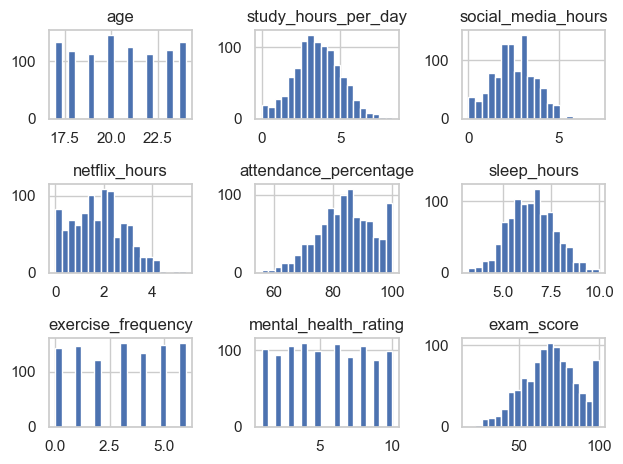

In [13]:
df.hist(bins=20, edgecolor = 'white')
plt.tight_layout()
plt.show()

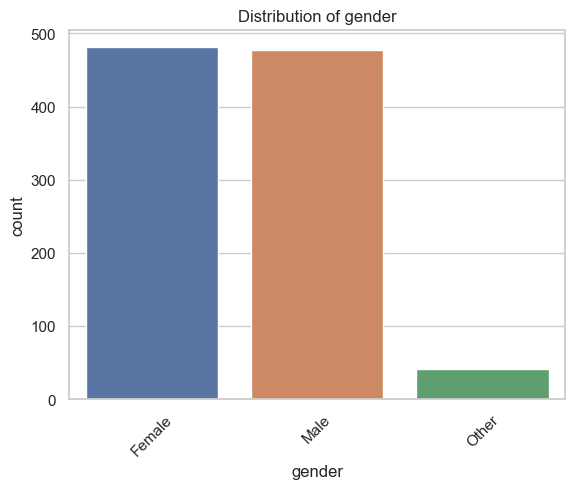

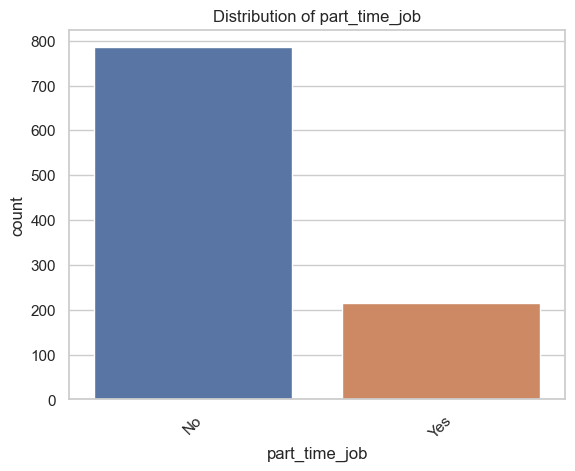

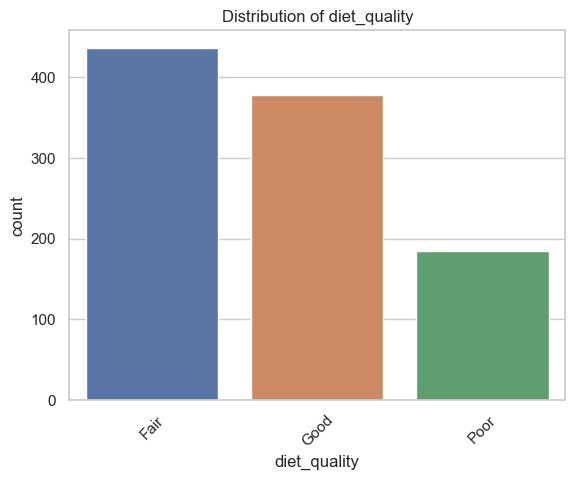

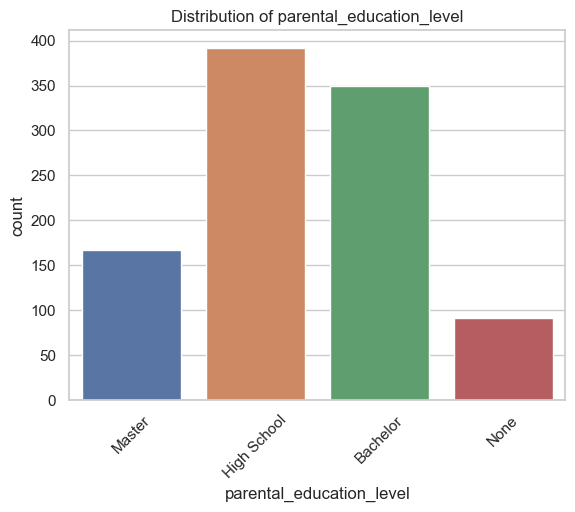

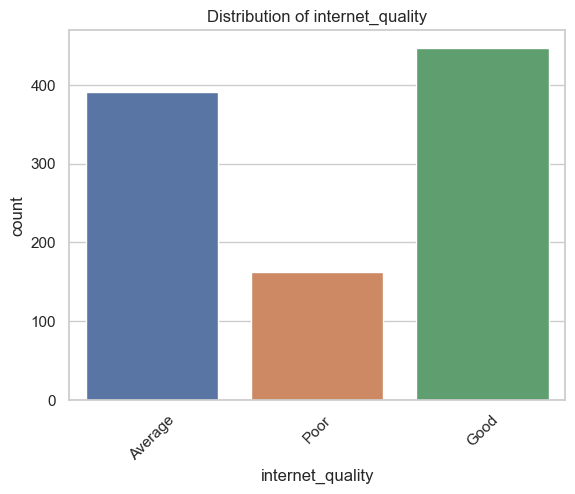

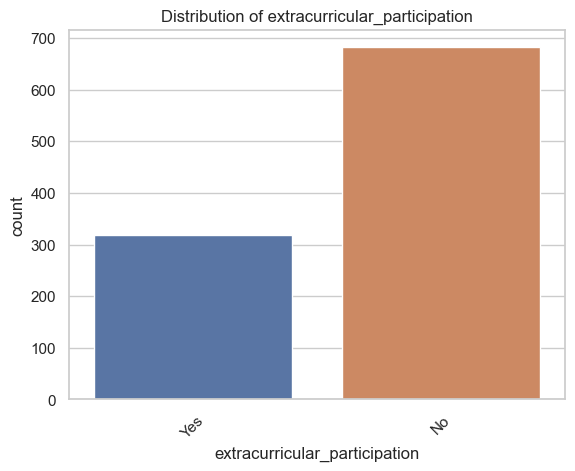

In [14]:
for col in categorical_col:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation= 45)
    plt.show()

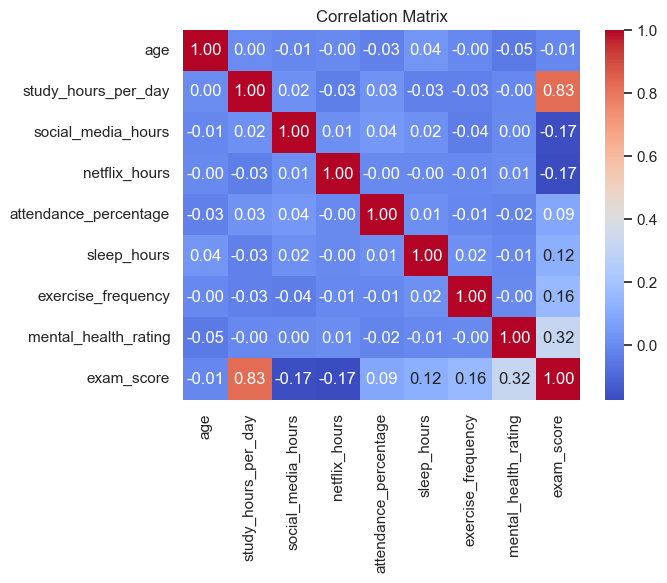

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [16]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

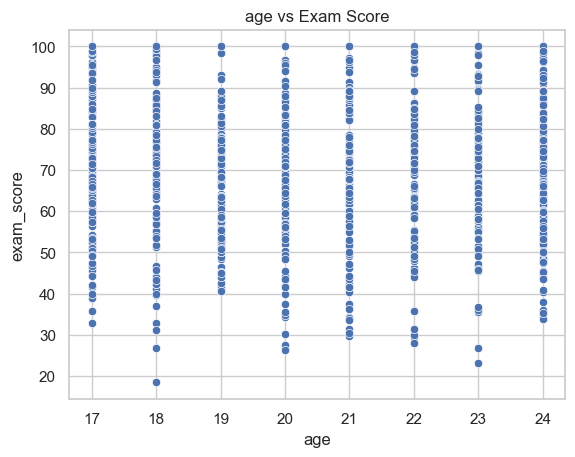

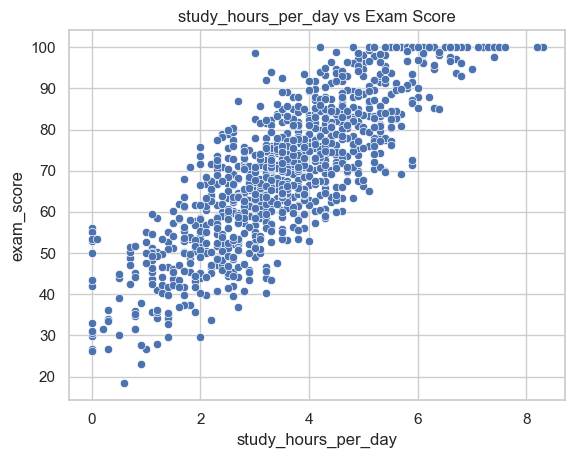

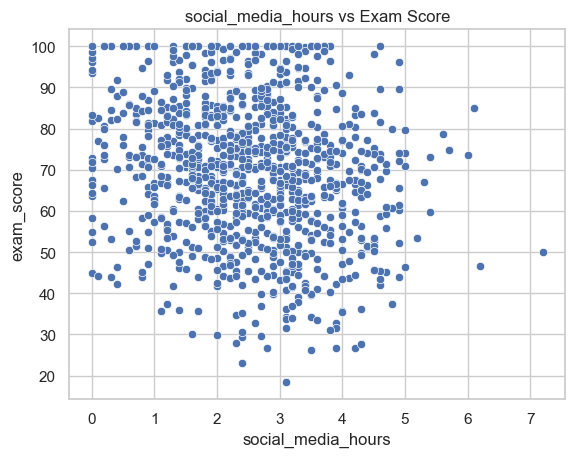

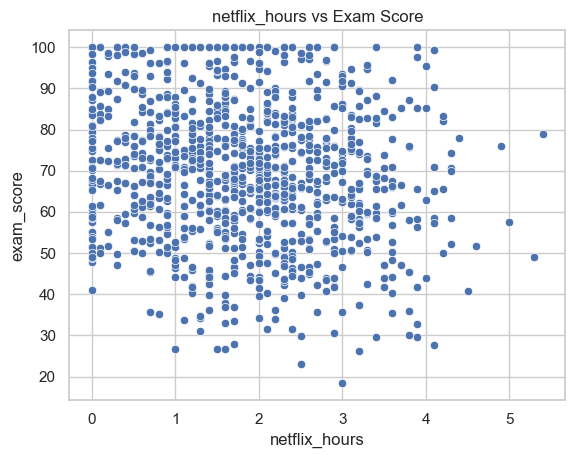

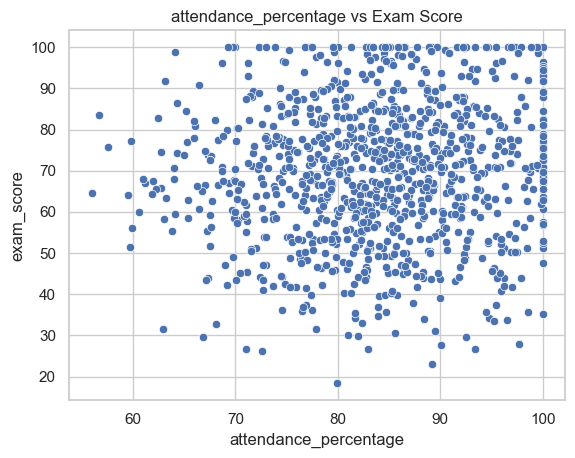

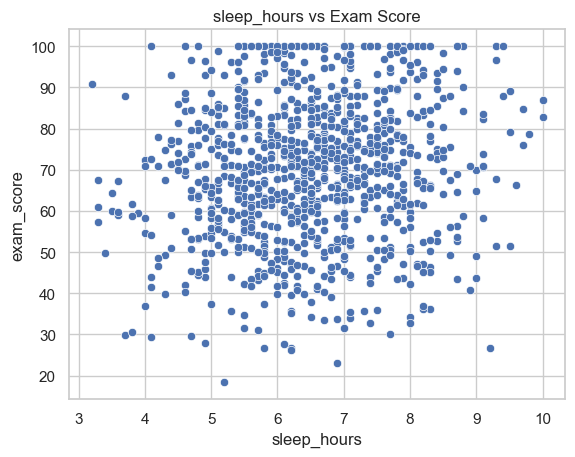

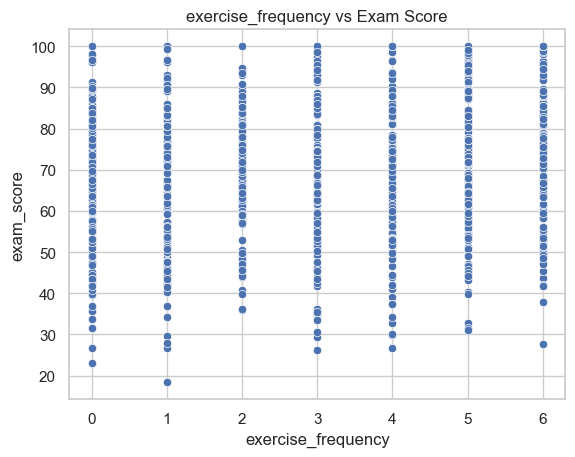

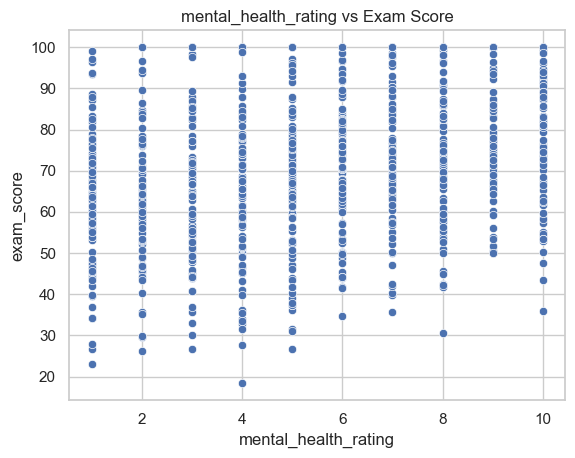

In [17]:
for feature in num_features:
    sns.scatterplot(data=df, x=feature, y= 'exam_score')
    plt.title(f"{feature} vs Exam Score")
    plt.show()

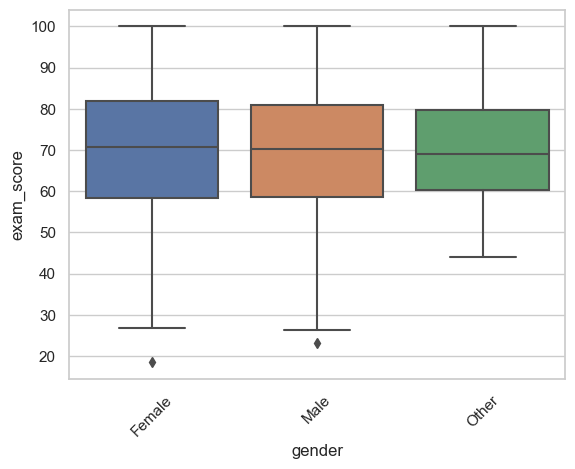

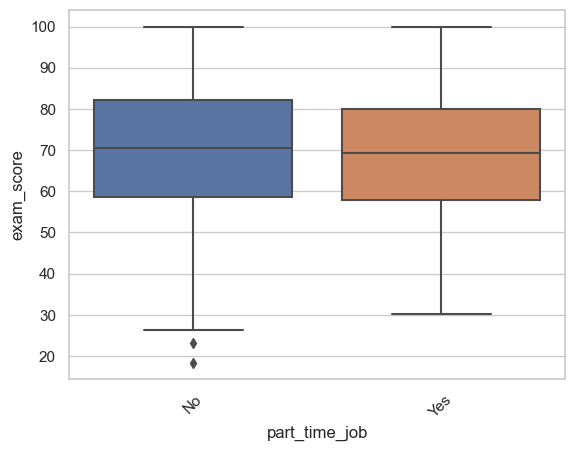

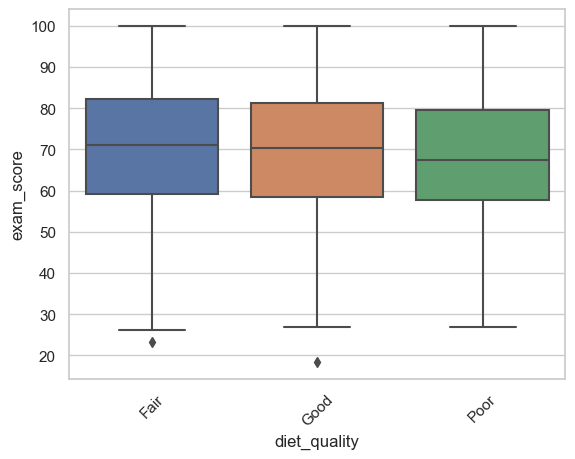

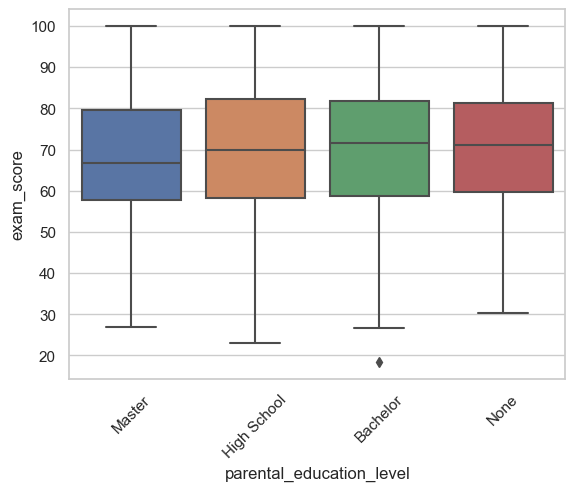

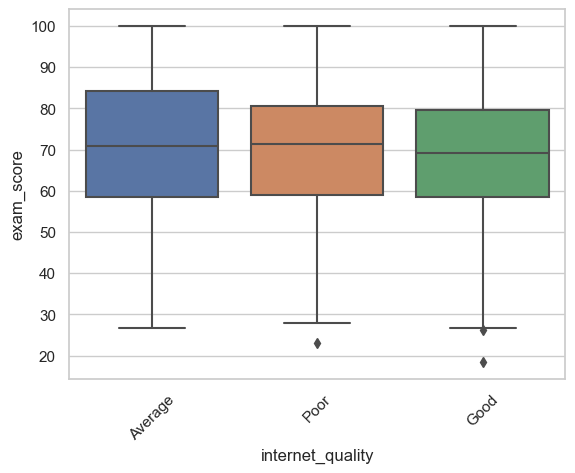

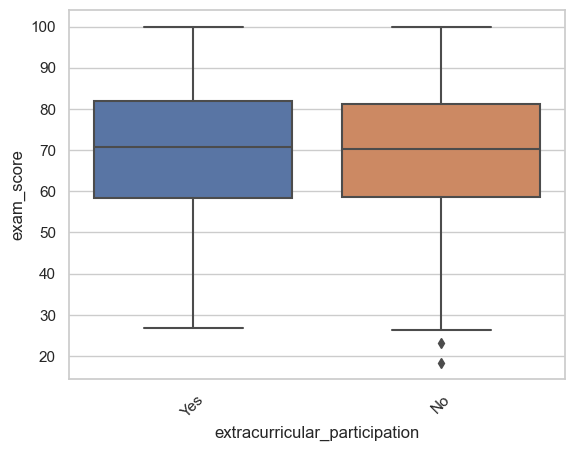

In [18]:
for col in categorical_col:
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.xticks(rotation= 45)
    plt.show()

## Feature Engineering and creating machine learning models

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [21]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [32]:
df.corr()["exam_score"]

age                     -0.008907
study_hours_per_day      0.825419
social_media_hours      -0.166733
netflix_hours           -0.171779
attendance_percentage    0.089836
sleep_hours              0.121683
exercise_frequency       0.160107
mental_health_rating     0.321523
exam_score               1.000000
Name: exam_score, dtype: float64

In [33]:
features = ["study_hours_per_day", "attendance_percentage", "mental_health_rating", "sleep_hours", "part_time_job"]

In [34]:
target = "exam_score"

In [35]:
df_model = df[features + [target]].copy()

In [37]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [38]:
le = LabelEncoder()

In [39]:
df_model["part_time_job"] = le.fit_transform(df_model["part_time_job"])

In [40]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [41]:
X = df_model[features]
y = df_model[target]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
len(y_train)

800

In [45]:
len(y_test)

200

In [47]:
models = {
    "linearRegression": {
        "model":LinearRegression(),
        "params": {}
    },
    "DecisionTree" : {
        "model": DecisionTreeRegressor(),
        "params": {"max_depth": [3, 5, 10], "min_samples_split": [2, 5]}
    },
    "RandomForest" : {
        "model": RandomForestRegressor(),
        "params": {"n_estimators":[50, 100], "max_depth": [5, 10]}
    }
}

In [48]:
best_models = []

In [49]:
for name, config in models.items():
    print(f"Training {name}")
    
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_squared_error")
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    
    best_models.append({
        'model': name,
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2": r2
    })

Training linearRegression
Training DecisionTree
Training RandomForest


In [51]:
best_models

[{'model': 'linearRegression',
  'best_params': {},
  'rmse': 7.530127668499719,
  'r2': 0.7770161991450159},
 {'model': 'DecisionTree',
  'best_params': {'max_depth': 5, 'min_samples_split': 2},
  'rmse': 8.834483474959583,
  'r2': 0.6930759215907456},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 5, 'n_estimators': 100},
  'rmse': 7.691848040232963,
  'r2': 0.7673355520013558}]

In [50]:
 result_df = pd.DataFrame(best_models)

In [53]:
result_df.sort_values(by="rmse")

,model,best_params,rmse,r2
0,linearRegression,{},7.530128,0.777016
2,RandomForest,"{'max_depth': 5, 'n_estimators': 100}",7.691848,0.767336
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",8.834483,0.693076


In [54]:
import joblib

best_row = result_df.sort_values(by="rmse").iloc[0]

In [55]:
best_row

model          linearRegression
best_params                  {}
rmse                   7.530128
r2                     0.777016
Name: 0, dtype: object

In [56]:
best_model_name = best_row["model"]

In [57]:
best_model_name

'linearRegression'

In [58]:
best_model_config = models[best_model_name]

In [59]:
best_model_config

{'model': LinearRegression(), 'params': {}}

In [61]:
# final_model = best_model_config["model"].set_params(**best_row["best_params"])

final_model = best_model_config["model"]

In [62]:
final_model.fit(X, y)

LinearRegression()

In [64]:
joblib.dump(final_model, "best_model.pkl")

['best_model.pkl']

In [66]:
joblib.load("best_model.pkl").predict(X_test)

array([ 96.62709515, 100.89640017,  50.40985274,  71.74830752,
        74.09193291,  57.40954206,  46.44644767,  62.7440743 ,
        67.30619872,  71.40870609,  68.48803827,  83.17577326,
       100.56218901,  91.74521865,  71.70531475,  81.62683152,
        57.71433589,  62.31615938,  72.00082564,  66.8369764 ,
        94.08800096, 111.41185466,  58.29622072,  58.6571462 ,
        72.98318162,  51.94040992,  86.82948552,  85.23133205,
        55.14238247,  76.23112327,  80.26844822,  60.89963179,
        59.22939619,  45.4546647 ,  76.33685807,  64.4523517 ,
        52.09706297,  72.44688195,  96.0362152 ,  76.47387452,
        68.48761418,  88.02501931,  56.4494147 ,  68.81874482,
        80.15094848,  55.4036186 ,  44.99788232,  80.57758661,
        83.95204193,  78.51088726, 103.40706523,  62.68591285,
        74.62943113,  73.92515157,  59.77364759,  54.24118589,
        89.75236787,  54.17570407,  73.31331709,  54.34520264,
        74.98494887,  75.38045631,  66.58691806,  67.26